# Assignment 2

### Modifications for Multi-Class Classification
To adapt the original neural network for five-class classification, the following updates were made:
- Output layer expanded to 5 neurons.
- Softmax activation added for multi-class probability output.
- Categorical cross-entropy loss implemented.
- Labels converted to one-hot encoding.
- Prediction updated using argmax on softmax outputs.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
np.random.seed(42)


## Generate dataset

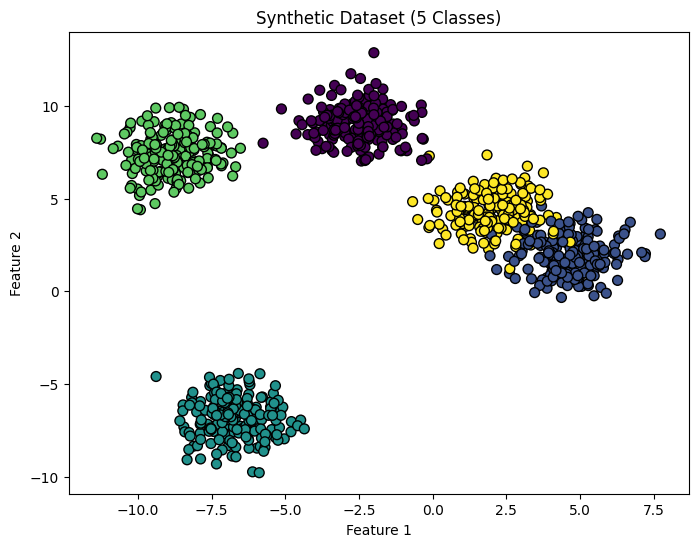

In [76]:
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=42)

# One-hot encode labels
def to_one_hot(labels, n_classes):
    return np.eye(n_classes)[labels]

y_one_hot = to_one_hot(y, 5)

# Split into Train and Test sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.2, random_state=42
)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Synthetic Dataset (5 Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Initialize Model

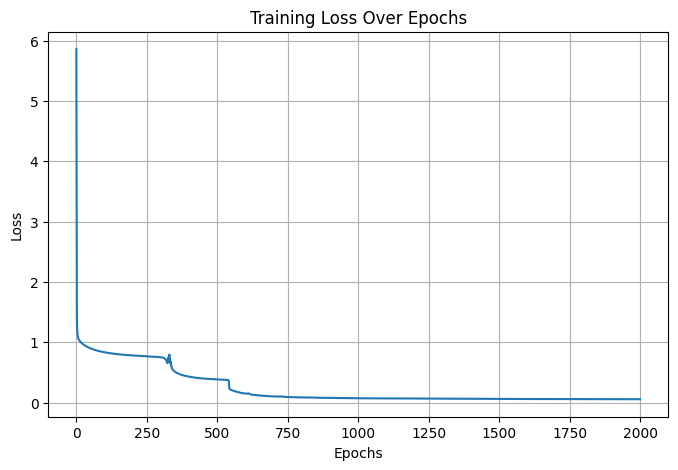

In [77]:
nn = NeuralNetwork(
    input_size=2,
    hidden1=32,
    hidden2=16,
    hidden3=8,
    output_size=5,
    learning_rate=0.1
)

# Train
epochs = 2000
loss_history = nn.train(X_train, y_train, epochs)

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(loss_history)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [78]:
print(nn.forward([[0,0]]))

[[0.00992126 0.06000624 0.80339949 0.01039814 0.11627487]]


In [79]:
print(nn.forward([[1,1]]))

[[7.70940471e-05 4.25069955e-01 7.01502506e-03 5.78951336e-05
  5.67780031e-01]]


## Evaluate on Train and Test

Train Accuracy: 98.12%
Test Accuracy: 97.50%
Prediction for [0, 0]: [2]
Prediction for [1, 1]: [4]


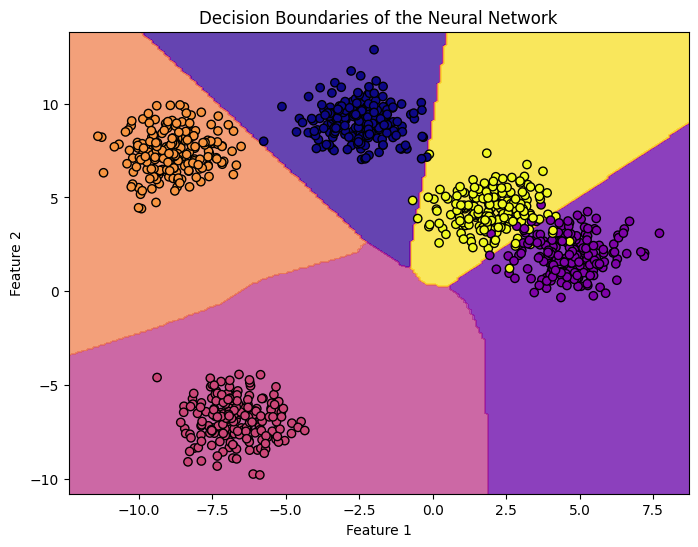

In [80]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)

y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

train_acc = np.mean(y_train_pred == y_train_labels)
test_acc = np.mean(y_test_pred == y_test_labels)

print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Test a couple of arbitrary points
print("Prediction for [0, 0]:", nn.predict(np.array([[0, 0]])))
print("Prediction for [1, 1]:", nn.predict(np.array([[1, 1]])))

# Decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = nn.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap="plasma")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="plasma", edgecolor="k")
plt.title("Decision Boundaries of the Neural Network")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()